In [1]:
from soss_tfit.core import core
from soss_tfit.science import mcmc
from soss_tfit.science import plot

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14.0, 6.0]

# printer
cprint = core.base_classes.Printer()

In [2]:
#load the Sampler object from pickle file
pfile="/home/dlafre/projects/def-dlafre/dlafre/tfit/outputs/wasp-52b_fixed_ld_sampler_full.pickle"
sampler=mcmc.Sampler.load(pfile)
tfit=sampler.tfit


#some info
print('Mode:',sampler.mode)
print('Number of walkers:',len(sampler.wchains))
print('Number of loops completed:',sampler.nloop)
print('Number of steps completed by each walker:',sampler.wchains[0].shape[0]*10)
print()
print('Number of steps/walker for next loop:',sampler.nsteps)
print('Increment of steps per loop:',tfit.params['NSTEPS_INC']['full'])
print()
print('Number of photometric bins',tfit.n_phot)
print('Number of fitted paramters',tfit.x0.size)


Mode: full
Number of walkers: 24
Number of loops completed: 1
Number of steps completed by each walker: 50000

Number of steps/walker for next loop: 50000
Increment of steps per loop: 0

Number of photometric bins 185
Number of fitted paramters 1119


In [4]:
#show the model parameters and their value
bpass=55
for i,n in enumerate(tfit.pnames):
    print(i,n,tfit.p0[i,bpass])

0 ZPT 0.00010590764972090661
1 q1 0.23490777452669556
2 q2 0.20171470724461377
3 SX1 -0.2097822995857447
4 SY1 0.8145421039225231
5 SR1 0.17181784386656673
6 SC1 0.6112712784994874
7 SX2 0.3327719633620492
8 SY2 0.5135129581399704
9 SR2 0.03807106727648225
10 SC2 0.5211979582882211
11 EP1 59910.41637059168
12 PE1 1.74978119
13 BB1 0.5912114197488854
14 RD1 0.16538393286839964
15 SMA1 7.234712507421118
16 EC1 0.0
17 ES1 0.0
18 DSC 1.0405597688849852
19 TC1 0.0054357564438384295


2023-06-19T20:51:07.286| PLOTTING: plot_transit_fit


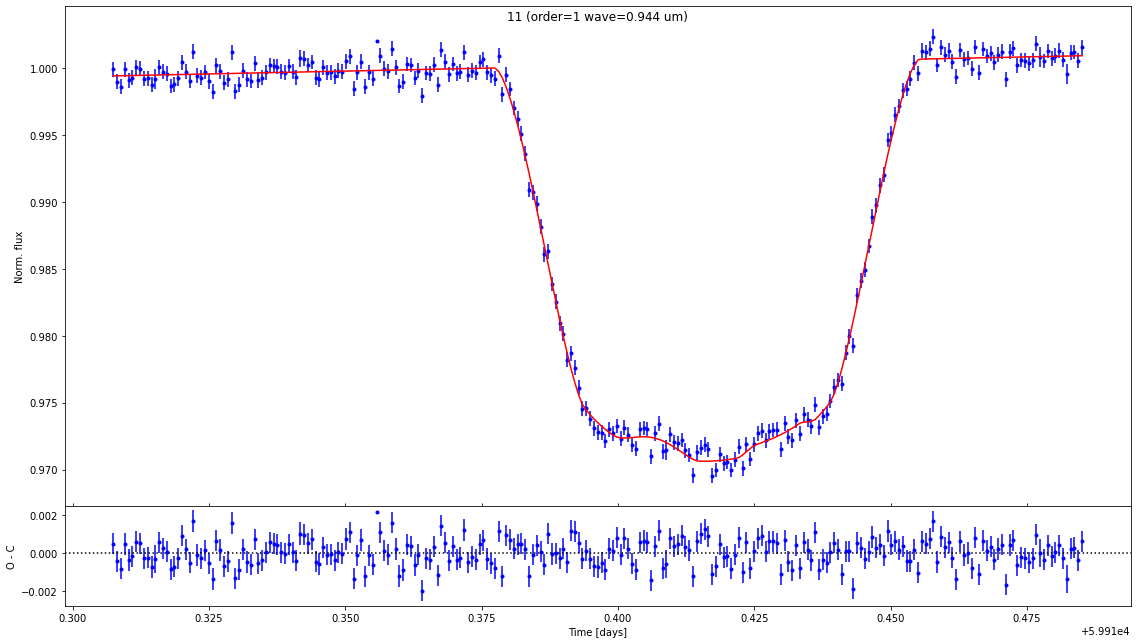

In [5]:
#plot fit for one spectroscopic ligth curves
bpass=11
plot.plot_transit_fit(tfit,bpass,residuals=1)

In [ ]:
#plot fit for all spectroscopic ligth curves
plot.plot_transit_fit(tfit)

In [ ]:
# compile results
cprint('Compiling results [percentiles]')
result_table = sampler.results(start_chain=10)

cprint('Results [percentile]:')
sampler.print_results('percentile')

In [ ]:
sampler.results_table['SHORTNAME'].value

In [ ]:
#plot the transmission spectrum
fig,ax = plot.plot_rprs_sq(tfit, sampler.results_table,return_object=True)

In [10]:
tfit.pnames

array(['ZPT', 'q1', 'q2', 'SX1', 'SY1', 'SR1', 'SC1', 'SX2', 'SY2', 'SR2',
       'SC2', 'EP1', 'PE1', 'BB1', 'RD1', 'SMA1', 'EC1', 'ES1', 'DSC',
       'TC1'], dtype='<U4')

In [ ]:
#plot the spectrum of any chromatic parameter
k="TC1"
fig,ax = plot.plot_spectrum(tfit, sampler.results_table,
                   key=k,plot_label=k,pkind='percentile',return_object=True)

In [ ]:
#plot the spectrum of any chromatic parameter
k="SC2"
fig,ax = plot.plot_spectrum(tfit, sampler.results_table,
                   key=k,plot_label=k,pkind='percentile',return_object=True)

In [ ]:
#plot the grtest for some chromatic param
mask=tfit.xnames=='RD1' #ZPT, DSC, RD1, SC1, SC2, TC1
plt.plot(tfit.wavelength[:, 0],sampler.grtest[mask],'.')
plt.axhline(1.02,ls=':',color='k')
plt.axhline(1.2,ls=':',color='k')

In [ ]:
#print the grtest for some bolometric params
keys=('EP1', 'BB1','SMA1','SX1','SY1','SR1','SX2','SY2','SR2')
for k in keys:
    print(k,sampler.grtest[tfit.xnames==k])

In [ ]:
key='SY1'
i,=(tfit.xnames==key).nonzero()
for w in range(len(sampler.wchains)):
    plt.plot(sampler.wchains[w][:,i])

In [ ]:
#corner plot for some params
import corner

bol_keys=['EP1', 'BB1','SX1','SY1','SR1','SX2','SY2','SR2']
chrom_keys=['SC1','SC2','RD1']
bpass=5

ipar=[]
for k in bol_keys:
    ipar.append((tfit.xnames==k).nonzero()[0][0])
for k in chrom_keys:
    ipar.append((tfit.xnames==k).nonzero()[0][bpass])

ipar=np.array(ipar)
print(ipar)

figure = corner.corner(sampler.chain[::5,ipar],labels=tfit.xnames[ipar])

['SMA1']


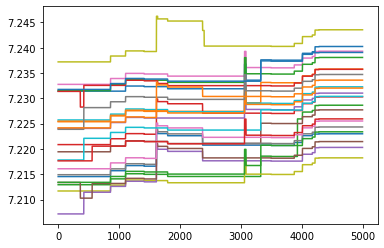

In [11]:
#show the walker chains
ikey,=(tfit.xnames=='SMA1').nonzero()
print(tfit.xnames[ikey])
for w in range(len(sampler.wchains)):
    plt.plot(sampler.wchains[w][:,ikey])

In [ ]:
#if wanted, use best solution to mask outlier points
if 0:
    #loop through band passes, identify outliers, amplify their error
    for bpass in range(tfit.n_phot):
        model=tfit.tmodel_func(tfit,bpass)
        res=np.abs(tfit.flux[bpass]-model)/np.nanmedian(tfit.fluxerr[bpass])
        ibad,=(res>3).nonzero()
        print(bpass,tfit.wavelength[0,bpass],'N outliers=',ibad.size)
        tfit.fluxerr[bpass,ibad]=np.nan
        
    #dump sampler again to save its updated tfit
    sampler.dump()